# Week 2 - lab 2: Linear regression

**This lab:** the aim is to: (i) build and evaluate linear regression models for data, and to (ii) use feature transofrmation to turn a linear regression model into a non-linear regression model.

During this lab, it is recommended to check the scikit-learn documentation on `LinearRegression` function.

## Regression on accidents dataset

1. Donwload and read the "accidents.csv" dataset based on the US highways i.e., load accidents. 

2. Build two linear regression models: (i) one with and (ii) one without bias (intercept), to predict the number of highway accidents (output)based on the state population (input). 

**Note:** for training use the column that gives the number of accidents per state (Traffic fatalities), and the column that gives the states populations (Total population). For training you need to solve least squares (see the online/lecture materials). 
First, use numpy's ```numpy.linalg.lstsq``` command to solve the associated least squares optimisation problems. Verify that the obtained coefficients will be the same as the close-form solution to the least squares using the Moore-Penrose pseudoinverse matrix (The pseudoinverse of a matrix can be computed by numpy commad ```np.linalg.pinv```). Finally train using sklearn's ```LinearRegression``` command and compre the obtained coefficients with the two schemes above (they should all give same result).

3. Scatterplot the training data. Display the two lines (one with bias/intercept and another without bias) that your model discovers for fitting the data.

4. Measure and print quality of the fits on the train data, using mean squared error (MSE) and R_sqared metrics.


Exercise source: https://uk.mathworks.com/help/matlab/data_analysis/linear-regression.html

In [3]:
import pandas as pd
import numpy as np

## insert code for 1
filepath = "./accidents.csv" #set path to the csv file 
df = pd.read_csv(filepath)
print(df.head())

# write code to extract data of fatalities and total population, and turn them into numpy vectors.
x = np.asarray(df['Total Population']).reshape(-1,1)
y = np.asarray(df['Traffic fatalities']).reshape(-1,1)
print("shape of x and y:", x.shape, y.shape)

   Census ID  Centroid Longitude  Centroid Latitude  Traffic fatalities  \
0         56         -107.555625          43.032664                 164   
1         11          -77.026928          38.892064                  43   
2         50          -72.556496          44.043498                  98   
3          2         -152.459342          64.609656                 101   
4         38          -99.499793          47.469117                 100   

   Licensed drivers (thousands)  Registered vehicles (thousands)  \
0                       380.180                          671.529   
1                       349.122                          240.403   
2                       550.462                          551.516   
3                       482.532                          681.115   
4                       461.780                          721.835   

   Vehicle-miles traveled (millions)  Miles traveled per vehicle  \
0                               9261                13790.915954   
1   

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data into train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("xtrain, xtest, ytrain, ytest shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)


# fit the model without bias with numpy's lstsq & print obtained coeff's
w = np.linalg.lstsq(x_train, y_train, rcond=None)[0]
print(f"lstsq_wob -- coef: {w}")

# fit the model with bias with numpy's lstsq & print obtained coeff's
# first update the feature matrix to have the all-one column
n = x_train.shape[0]  # number of data samples (rows)
# Append a column of ones to the feature matrix X
x_train_new = np.hstack((np.ones((n, 1)), x_train))
w = np.linalg.lstsq(x_train_new, y_train, rcond=None)[0]
print(f"lstsq_wb -- coef: {w[1:]}, bias: {w[0]}")

# fit the model without bias using pinv & print obtained coeff's
w = np.linalg.pinv(x_train) @ y_train
print(f"pinv_wob -- coef: {w}")

# fit the model with bias with pinv & print obtained coeff's
w = np.linalg.pinv(x_train_new) @ y_train
print(f"pinv_wb -- coef: {w[1:]}, bias: {w[0]}")

# fit model without bias using sklearn Linear regression & print obtained coeff's
without_bias = LinearRegression(fit_intercept=False) #model without intercept
without_bias.fit(x_train, y_train)
print(f"sklearn_wob -- coef: {without_bias.coef_}")

predictions_wob = without_bias.predict(x_test)

# fit the model with bias using sklearn Linear regression & print obtained coeff's
with_bias = LinearRegression() #model with intercept
with_bias.fit(x_train, y_train)
print(f"sklearn_wb -- coef: {with_bias.coef_}, bias {with_bias.intercept_}")


xtrain, xtest, ytrain, ytest shapes: (40, 1) (11, 1) (40, 1) (11, 1)
lstsq_wob -- coef: [[0.00013736]]
lstsq_wb -- coef: [[0.0001263]], bias: [148.28407118]
pinv_wob -- coef: [[0.00013736]]
pinv_wb -- coef: [[0.0001263]], bias: [148.28407118]
sklearn_wob -- coef: [[0.00013736]]
sklearn_wb -- coef: [[0.0001263]], bias [148.28407118]


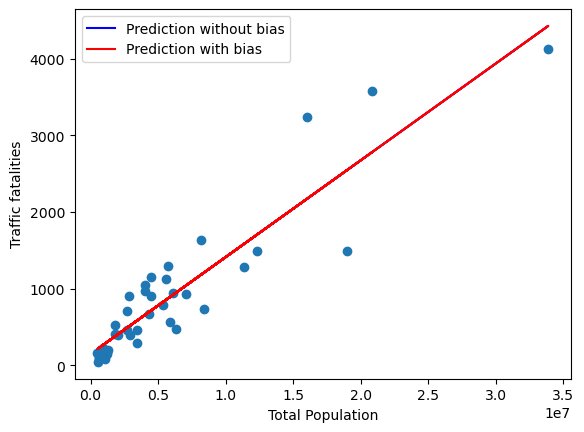

In [17]:
## insert code for 3: scatterplot the training data and on the same plot show the two (with/without bias) regression fits
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.xlabel("Total Population")
plt.ylabel("Traffic fatalities")

y_train_pred_wb = with_bias.coef_ * x_train + with_bias.intercept_
y_train_pred_wb = with_bias.predict(x_train)

plt.plot(x_train, y_train_pred_wb,'b', label = 'Prediction without bias')
plt.plot(x_train, y_train_pred_wb,'r', label = 'Prediction with bias')
plt.legend()
plt.show()


In [ ]:
## insert code for step 4: measuring fit quality on train data using MSE and R2 metircs. 
from sklearn.metrics import mean_squared_error, r2_score


## Extension to nonlinear fitting

One trick that can be used to solve a non-linear regression problem using a linear regression model is to transform data features using a basis function e.g., a polynomial basis, to obtain nonlinear features. This is called feature engineering. In this exercise we want to use this trick and build a polynomial fitting model

1. Create a training dataset: sample regularly n= 30 data points (x,y) from this model: y = sin(2*pi*x), where 0=<x<=1.

2. Contaminate the outputs of your samples with gaussian noise (0-mean, variance=0.01) using numpy’s random.randn command.

3. Visualise your dataset using scatter plot. 

In [ ]:
# insert code 


The data shown in the plot produced has nonlinear relationships between input (x) and output (y). Therefore, to make predictions a non-linear regression/fitting model would be required. We will fit this data with polynomials of order 3.

1. To do so, transform the 1D features (x) to a 4D feature matrix (X) as follows X = [x<sup>3</sup>, x<sup>2</sup>, x<sup>1</sup>, x<sup>0</sup>]. By fitting a linear regression to this new feature matrix we would obtain regression coefficients w=[w3,w2,w1,w0] that would describe a polynomia prediction model:y_pred = X*w = w3 x<sup>3</sup> + w2 x<sup>2</sup> + w1 x +w0. 


2. Now, build this polynomial feature matrix, and use it to train (fit) a linear regression model using sklearn ```LinearRegression``` command.

   NB: ```LinearRegression``` command does not apply regularisation during fitting. To add ridge (L1) or lasso (L2) regularisations during fitting, you can use sklearn's ```sklearn.linear_model.Ridge``` or ```sklearn.linear_model.Lasso``` models, for which you need to set the regularisation strength (alpha) hyperparameter. (generally, these hyperparameters can be tuned by cross-validations and sklearn also gives options for automated hyperparameter tuning).

4. With your trained model make predictions on the training data i.e. y_pred = model.predict(X). Plot the predicted results vs the original data to see the quality of the fit.


5. Also examine the fit quality on training data using the MSE and R_sequare metrics.

6. Repeat above with a feature matrix having polynomials of order 10.